Fitting with ScikitLearn - Part 2
==========================
<div class="overview">
   <p class="overview-title">Overview</p>
    <p>Questions</p>
        <ul>
            <li>How can I use scikitlearn to fit machine learning models?</li>
        </ul>
    <p>Objectives:</p>
        <ul>
            <li>Slice a pandas dataframe to get `X` and `Y` values and convert them to NumPy Arrays.</li>
            <li>Use the `LinearRegression` model in scikitlearn to perform a linear fit.</li>
        </ul>
    <p>Keypoints:</p>
        <ul>
            <li>You must import and create the model you want to use from scikitlearn.</li>
            <li>SciKitLearn models require `X` and `Y` values that are at least two dimensional.</li>
            <li>Use `.reshape` on your NumPy arrays to make sure they are the correct dimension.</li>
            <li>Fit SciKitLearn models by giving them data and using the `fit` method.</li>
            <li>Use the `predict` method after fitting to make predictions</li>
        </ul>
    </div>

## Data Preparation

In [1]:
import os
import pandas as pd

In [2]:
plates = pd.read_csv("data/rxnpredict/data_table.csv")

In [3]:
plates.head()

,plate,row,col,base,base_cas_number,base_smiles,ligand,ligand_cas_number,ligand_smiles,aryl_halide_number,aryl_halide,aryl_halide_smiles,additive_number,additive,additive_smiles,product_smiles,yield
0,1,1,1,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,1.0,1-chloro-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Cl)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,26.888615
1,1,1,2,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,2.0,1-bromo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Br)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,24.063224
2,1,1,3,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,3.0,1-iodo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(I)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,47.515821
3,1,1,4,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,4.0,1-chloro-4-methoxybenzene,COc1ccc(Cl)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,2.126831
4,1,1,5,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,5.0,1-bromo-4-methoxybenzene,COc1ccc(Br)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,47.586354


In [4]:
descriptors = pd.read_csv("data/rxnpredict/output_table_modified.csv")

In [5]:
descriptors.head()

,additive_*C3_NMR_shift,additive_*C3_electrostatic_charge,additive_*C4_NMR_shift,additive_*C4_electrostatic_charge,additive_*C5_NMR_shift,additive_*C5_electrostatic_charge,additive_*N1_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,additive_E_LUMO,...,ligand_V6_intensity,ligand_V7_frequency,ligand_V7_intensity,ligand_V8_frequency,ligand_V8_intensity,ligand_V9_frequency,ligand_V9_intensity,ligand_dipole_moment,plate,row
0,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,1,1
1,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,1,1
2,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,1,1
3,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,1,1
4,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.21,1.212924,1,1


In [6]:
# Join on common columns

# Pull out just what we need
plates_join = plates[["plate", "row", "col", "yield"]]

In [7]:
dataset = pd.merge(descriptors, plates, on=["plate", "row", "col"])

In [8]:
dataset.head()

,additive_*C3_NMR_shift,additive_*C3_electrostatic_charge,additive_*C4_NMR_shift,additive_*C4_electrostatic_charge,additive_*C5_NMR_shift,additive_*C5_electrostatic_charge,additive_*N1_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,additive_E_LUMO,...,ligand_cas_number,ligand_smiles,aryl_halide_number,aryl_halide,aryl_halide_smiles,additive_number,additive,additive_smiles,product_smiles,yield
0,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,1.0,1-chloro-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Cl)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,26.888615
1,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,2.0,1-bromo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Br)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,24.063224
2,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,3.0,1-iodo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(I)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,47.515821
3,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,4.0,1-chloro-4-methoxybenzene,COc1ccc(Cl)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,2.126831
4,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,5.0,1-bromo-4-methoxybenzene,COc1ccc(Br)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,47.586354


## Using SciKitLearn to Fit

In [9]:
X = dataset[descriptors.columns].to_numpy()
Y = dataset["yield"].to_numpy()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
X_fit = sc.fit_transform(X)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [15]:
regressor = RandomForestRegressor()
regressor.fit(X_fit, Y)

RandomForestRegressor()

In [16]:
y_pred = regressor.predict(X_fit)

In [17]:
import matplotlib.pyplot as plt

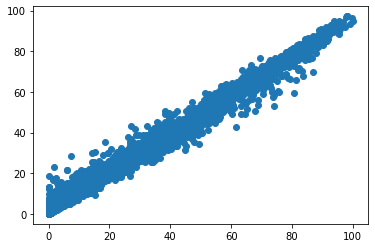

In [18]:
fig, ax = plt.subplots()
ax.scatter(Y, y_pred)

## Training Testing Split

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fit, Y, test_size=0.30)

In [21]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [22]:
y_pred = regressor.predict(X_test)

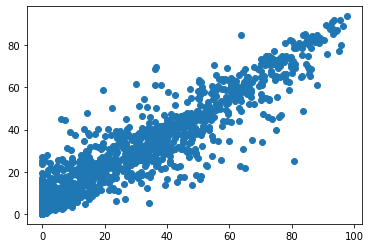

In [23]:
plt.scatter(Y_test, y_pred)

In [24]:
from sklearn import metrics
import math

In [25]:
metrics.r2_score(Y_test, y_pred)

0.8545731030213027

In [26]:
math.sqrt(metrics.mean_squared_error(Y_test, y_pred))

9.966163336163948